### 회귀트리

- 지금까지 선형 회귀에 대해서 알아보았다. 선형회귀는 회귀 게수의 관계를 모두 선형으로 가정하는 방식입니다.
- 일반적으로 선형회귀는 회귀계수를 선형으로 결합하는 회귀 함수를 구해, 여기에 독립변수를 입력해 결괏값을 예측하는 것입니다.
- 비선형 회귀 역시 비선형 회귀 함수를 통해 결괏값을 예측합니다. 다만 비선형 회귀는 회귀 계수의 결합이 비선형일뿐입니다. 
- 머신러닝 기반의 회귀는 회귀 계수를 기반으로 하는 최적 회귀 함수를 도출하는 것이 목표입니다.

- 이 절에서는 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식을 소개하겠습니다.
- 트리 기반의 회귀는 회귀 트리를 이용하는 것입니다. 즉 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것입니다.
- 분류 트리와 크게 다르지 않는다. 다만 리프 노드에서 예측 결정값을 만드는 과정에 차이가 있다.
    - 분류 트리가 특정 클래스 테이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산합니다.

- 결정트리, 랜덤 포레스트, GBM, XGBoost, LightGBM등의 앞 4장의 분류에서 소개한 모든 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능하다.
- 트리 생성이 CART(Classification And Regression Trees) 알고리즘에 기반하고 있기 때문이다.
- 사이킷런에서는 결정트리, 랜덤 포레스트, GBM에서 CART기반의 회귀 수행을 할 수 있는 Estimator클래스를 제공합ㄴ니다. 또한 XGBoot, LightGBM도 사이킷런 래퍼 클래스를 통해 이를 제공합니다.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE socres : ', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE socres :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [2]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

- 사이킷런의 여러 회귀 트리 클래스를 이용하여 회귀 예측

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data,y_target)


##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.251
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


- 회귀 트리는 선형 회귀의 회귀계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있습니다.

<AxesSubplot:>

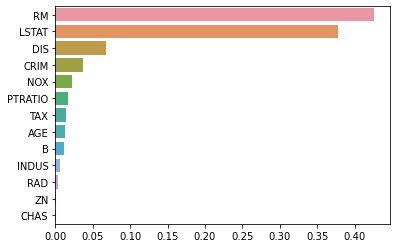

In [4]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

- 오퍼피티을 시각화 하기 위해 한개의 피처 RM과 타겟값 PRICE기반으로 회귀 예측 수행

(100, 2)


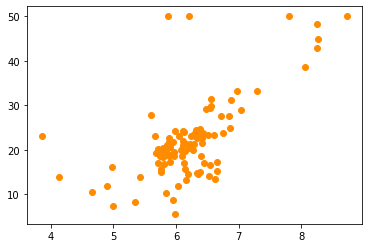

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange') # scatter은 산점도

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형회귀와 결정 트리 기반의 Regressor 생성 DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

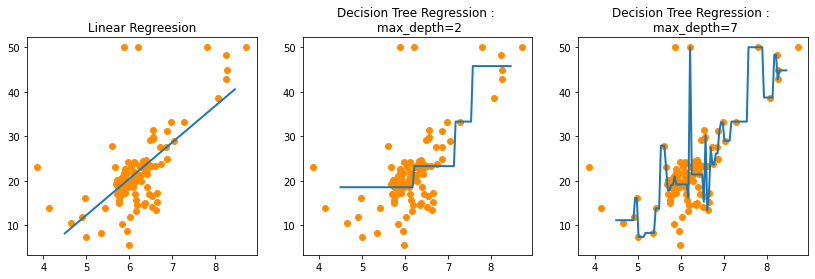

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# x축값을 4.5~8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regreesion')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 대 회귀 예측선
ax2.set_title('Decision Tree Regression : \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)


# DecsionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression : \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

- 선형 회귀는 예측 회귀선을 표현하는데 반해
- 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다.
- max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귄선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수있다.